In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [74]:
ball_by_ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

In [75]:
sorted_df = ball_by_ball.sort_values(by=['id', 'inning', 'over', 'ball'])

In [76]:
merged_df = sorted_df.merge(matches[['id','venue','toss_decision','toss_winner']], on='id', how='inner')

In [77]:
grouped = sorted_df.groupby(['id','inning','over']).sum()

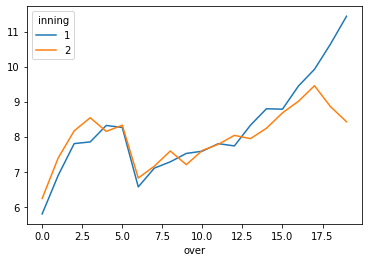

In [78]:
grouped.groupby(['over','inning']).mean()['total_runs'].unstack().plot(kind='line')

### Balls Faced

In [79]:
ball_by_ball['batsman'].value_counts()

V Kohli          4609
S Dhawan         4208
RG Sharma        4088
SK Raina         4041
DA Warner        3819
                 ... 
S Kaushik           1
U Kaul              1
DP Vijaykumar       1
YA Abdulla          1
Y Prithvi Raj       1
Name: batsman, Length: 537, dtype: int64

### Man of Match

In [80]:
matches['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
                  ..
HF Gurney          1
SO Hetmyer         1
R Bhatia           1
S Aravind          1
K Rabada           1
Name: player_of_match, Length: 233, dtype: int64

In [81]:
val = sorted_df.groupby(['id','batsman']).agg(match_runs=('batsman_runs', 'sum'), match_balls=('id', 'count'), match_dismissed = ('is_wicket','sum'))

In [82]:
val = val.reset_index()

In [83]:
sorted_df['ball_innings'] = sorted_df['over'] * 6 + sorted_df['ball']

In [84]:
batsman_statistics = val.groupby('batsman').agg(total_runs = ('match_runs','sum'), total_balls = ('match_balls','sum'), dismissals = ('match_dismissed', 'sum'), innings = ('id', 'count'))

In [85]:
batsman_statistics['strike_rate'] = batsman_statistics['total_runs']/batsman_statistics['total_balls'] * 100
batsman_statistics['average'] = batsman_statistics['total_runs']/batsman_statistics['innings']

In [86]:
batsman_statistics

total_runs  total_balls  dismissals  innings  strike_rate  \
batsman                                                                     
A Ashish Reddy         280          196          15       23   142.857143   
A Chandila               4            7           1        2    57.142857   
A Chopra                53           75           5        6    70.666667   
A Choudhary             25           20           2        3   125.000000   
A Dananjaya              4            5           0        1    80.000000   
...                    ...          ...         ...      ...          ...   
YV Takawale            192          183           8       10   104.918033   
Yashpal Singh           47           67           4        4    70.149254   
Younis Khan              3            7           1        1    42.857143   
Yuvraj Singh          2750         2205         109      126   124.716553   
Z Khan                 117          141          15       27    82.978723   

                  average  
batsman                    
A Ashish Reddy  12.173913  
A Chandila       2.000000  
A Chopra         8.833333  
A Choudhary      8.333333  
A Dananjaya      4.000000  
...                   ...  
YV Takawale     19.200000  
Yashpal Singh   11.750000  
Younis Khan      3.000000  
Yuvraj Singh    21.825397  
Z Khan           4.333333  

[537 rows x 6 columns]

In [87]:
batsman_statistics.sort_values(by=['average','strike_rate'],ascending=False).head(20)

total_runs  total_balls  dismissals  innings  strike_rate  \
batsman                                                                     
JM Bairstow            790          576          20       21   137.152778   
LMP Simmons           1079          878          27       29   122.892938   
DA Warner             5254         3819         126      142   137.575281   
KL Rahul              2647         1990          62       72   133.015075   
CH Gayle              4772         3342         116      131   142.788749   
HM Amla                577          418          13       16   138.038278   
SE Marsh              2477         1908          64       69   129.821803   
ML Hayden             1107          838          27       32   132.100239   
MEK Hussey            1977         1648          52       58   119.963592   
RD Gaikwad             204          173           3        6   117.919075   
MN van Wyk             167          135           3        5   123.703704   
V Kohli               5878         4609         163      184   127.533087   
D Padikkal             473          398          14       15   118.844221   
CA Lynn               1280          938          37       41   136.460554   
KS Williamson         1619         1222          41       52   132.487725   
AB de Villiers        4849         3264         114      156   148.560049   
RR Pant               2079         1416          59       68   146.822034   
JC Buttler            1714         1184          48       57   144.763514   
SR Tendulkar          2334         2044          71       78   114.187867   
F du Plessis          2302         1828          67       77   125.929978   

                  average  
batsman                    
JM Bairstow     37.619048  
LMP Simmons     37.206897  
DA Warner       37.000000  
KL Rahul        36.763889  
CH Gayle        36.427481  
HM Amla         36.062500  
SE Marsh        35.898551  
ML Hayden       34.593750  
MEK Hussey      34.086207  
RD Gaikwad      34.000000  
MN van Wyk      33.400000  
V Kohli         31.945652  
D Padikkal      31.533333  
CA Lynn         31.219512  
KS Williamson   31.134615  
AB de Villiers  31.083333  
RR Pant         30.573529  
JC Buttler      30.070175  
SR Tendulkar    29.923077  
F du Plessis    29.896104

In [88]:
batsman_statistics = batsman_statistics.reset_index()

In [89]:
sorted_df = sorted_df[sorted_df['extra_runs'] == 0]

In [90]:
iv = pd.Interval(left=6, right=9)

In [91]:
batsmen = list(set(list(sorted_df['batsman'])))

In [92]:
batsmen_mean_dict = {}

In [93]:
for name in batsmen:
    test = sorted_df[sorted_df['batsman'] == name]
    test = test[['batsman','id','batsman_runs','ball_innings']]
    test['balls_played'] = test.groupby('id').cumcount() + 1
    df = pd.pivot_table(test, values='batsman_runs',index='ball_innings',columns='id', aggfunc=np.sum)
    df = df.fillna(0)
    df = df.cumsum()
    test_ind = test.groupby('id').agg(total_runs = ('batsman_runs','sum'), total_balls = ('ball_innings','count'))
    bins = list(np.arange(0,101,3))
    groups = test.groupby(['id', pd.cut(test['balls_played'], bins)])
    val = groups.batsman_runs.sum().dropna()
    test_ind['run per ball'] = test_ind['total_runs'] / test_ind['total_balls']
    val = pd.DataFrame(val)
    val = val.reset_index()
    temp_exp = val.groupby('balls_played').agg(mean_runs = ('batsman_runs','mean'), total_innings =  ('balls_played','count')).dropna()
    temp_exp = temp_exp.reset_index()
    temp_exp['mean_runs'] = temp_exp['mean_runs'].round(0).astype(int)
    batsmen_mean_dict[name] = temp_exp

In [94]:
final_report = pd.DataFrame(columns=['Runs Scored','Balls Faced','Actual Strike Rate','Game Strike Rate','Expected Runs','Percentage Change'])

In [95]:
filename = "Data Dump/1082592.csv"
test = pd.read_csv(filename)
penalty = 0.85
for name in list(test['striker'].value_counts().head(5).index):
    test = pd.read_csv(filename)
    compare = batsmen_mean_dict[name]
    match_id = list(set(list(test['match_id'])))[0]
    test = test[test['extras'] == 0]
    test = test[test['striker'] == name]
    if name in list(set(list(test['player_dismissed']))):
        dismissal_weight = compare['total_innings'].iloc[len(temp_val)-1] / compare.iloc[0,2:][0]
    else:
        dismissal_weight = 0
    test = test[['striker', 'runs_off_bat']]
    test['balls_played'] = test.groupby('striker').cumcount() + 1
    groups = test.groupby(['striker', pd.cut(test['balls_played'], bins)])
    temp_val = groups['runs_off_bat'].sum().dropna()
    temp_val = temp_val.reset_index()

    final_report.at[str(match_id) +"_"+name, 'Runs Scored'] = temp_val['runs_off_bat'].sum()
    final_report.at[str(match_id) +"_"+name, 'Balls Faced'] = len(test)
    final_report.at[str(match_id) +"_"+name, 'Actual Strike Rate'] = batsman_statistics[batsman_statistics['batsman'] == name]['strike_rate'].values[0]
    final_report.at[str(match_id) +"_"+name, 'Game Strike Rate'] = temp_val['runs_off_bat'].sum()/len(test) * 100
    final_report.at[str(match_id) +"_"+name, 'Expected Runs'] = compare.iloc[:len(temp_val),:]['mean_runs'].sum()
    final_report.at[str(match_id) +"_"+name, 'Dismissal Weight'] = dismissal_weight
    final_report.at[str(match_id) +"_"+name, 'Runs Scored Change'] = ((temp_val['runs_off_bat'] / compare['mean_runs']) - penalty).sum()
    final_report.at[str(match_id) +"_"+name, '% Change'] = ((temp_val['runs_off_bat'] / compare['mean_runs']) - penalty).sum() - dismissal_weight

In [96]:
final_report

Runs Scored Balls Faced Actual Strike Rate  \
1082592_SPD Smith           84          54            125.565   
1082592_AM Rahane           60          34            118.286   
1082592_N Rana              34          28            131.473   
1082592_JC Buttler          38          19            144.764   
1082592_KA Pollard          27          17            143.474   

                   Game Strike Rate Expected Runs Percentage Change  \
1082592_SPD Smith           155.556            75               NaN   
1082592_AM Rahane           176.471            41               NaN   
1082592_N Rana              121.429            39               NaN   
1082592_JC Buttler              200            30               NaN   
1082592_KA Pollard          158.824            26               NaN   

                    Dismissal Weight  Runs Scored Change  % Change  
1082592_SPD Smith           0.000000            5.283333  5.283333  
1082592_AM Rahane           0.092857            7.966667  7.873810  
1082592_N Rana              0.181818            0.500000  0.318182  
1082592_JC Buttler          0.210526            2.950000  2.739474  
1082592_KA Pollard          0.243056            1.500000  1.256944

In [97]:
final_report.to_excel('Report.xlsx', index = False)

In [98]:
test = pd.read_csv("Data Dump/1082592.csv")

In [99]:
test.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [100]:
ball_by_ball = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
sorted_df = ball_by_ball.sort_values(by=['id', 'inning', 'over', 'ball'])
sorted_df['ball_innings'] = sorted_df['over'] * 6 + sorted_df['ball']

In [101]:
bowlers = list(set(list(sorted_df['bowler'])))

In [102]:
bowler_mean_dict = {}
for name in bowlers:
    test = sorted_df[sorted_df['bowler'] == name]
    
    test = test[['bowler','id','total_runs','ball_innings']]
    test['balls_bowled'] = test.groupby('id').cumcount() + 1
    
    df = pd.pivot_table(test, values='total_runs',index='ball_innings',columns='id', aggfunc=np.sum)
    df = df.fillna(0)
    df = df.cumsum()
    test_ind = test.groupby('id').agg(total_runs = ('total_runs','sum'), total_balls = ('ball_innings','count'))
    bins = list(np.arange(0,101,3))
    groups = test.groupby(['id', pd.cut(test['balls_bowled'], bins)])
    val = groups.total_runs.sum().dropna()
    test_ind['run per ball'] = test_ind['total_runs'] / test_ind['total_balls']
    val = pd.DataFrame(val)
    val = val.reset_index()
    temp_exp = val.groupby('balls_bowled').agg(mean_runs = ('total_runs','mean'), total_innings =  ('balls_bowled','count')).dropna()
    temp_exp = temp_exp.reset_index()
    temp_exp['mean_runs'] = temp_exp['mean_runs'].round(0).astype(int)
    bowler_mean_dict[name] = temp_exp

In [103]:
sorted_df.loc[sorted_df['dismissal_kind'] == 'run out', 'bowler_not_involved'] = 1
sorted_df['bowler_not_involved'] = sorted_df['bowler_not_involved'].fillna(0)
sorted_df['is_bowler_wicket'] = sorted_df['is_wicket'] - sorted_df['bowler_not_involved']

mean_wicket_dict ={}
for name in bowlers:
    test = sorted_df[sorted_df['bowler'] == name]
    val = (test.groupby('id')['is_bowler_wicket'].sum()).mean()
    mean_wicket_dict[name] = val

In [104]:
final_report = pd.DataFrame()

In [105]:
filename = "Data Dump/1082594.csv"
test = pd.read_csv(filename)
test_1 = test
for name in list(test['bowler'].value_counts().head(5).index):
    penalty = 0.90
    test = test_1
    compare = bowler_mean_dict[name]
    match_id = list(set(list(test['match_id'])))[0]
    test = test[test['bowler'] == name]
    
    test['total_runs'] = test['runs_off_bat'] + test['extras']
    
    test = test[['bowler', 'total_runs']]
        
    test['balls_played'] = test.groupby('bowler').cumcount() + 1
    groups = test.groupby(['bowler', pd.cut(test['balls_played'], bins)])
    temp_val = groups['total_runs'].sum().dropna()
    temp_val = temp_val.reset_index()
    
    economy_score = sum((temp_val['total_runs'] / compare['mean_runs']).fillna(penalty) - penalty)
    expected_runs = compare['mean_runs'].iloc[:len(temp_val)].sum()
    actual_runs = temp_val['total_runs'].sum()
    
    test = test_1   
    test = test[test['bowler'] == name]
    if len(test[test['wicket_type'] != 'runout'].dropna(subset= ['player_dismissed'])) > 0:
        val = len(test[test['wicket_type'] != 'runout'].dropna(subset= ['player_dismissed']))/mean_wicket_dict[name] - sum((temp_val['total_runs'] / compare['mean_runs']).fillna(penalty) - penalty)
    else:
        val = -(sum((temp_val['total_runs'] / compare['mean_runs']).fillna(penalty) - penalty))
        
    
    wickets = len(test[test['wicket_type'] != 'runout'].dropna(subset= ['player_dismissed']))
    
    final_value = val
    
    final_report.at[str(match_id) +"_"+name, 'Runs Conceeded'] = actual_runs
    final_report.at[str(match_id) +"_"+name, 'Expected Runs'] = expected_runs
    final_report.at[str(match_id) +"_"+name, 'Economony Score'] = economy_score
    final_report.at[str(match_id) +"_"+name, 'Expected Wickets'] = mean_wicket_dict[name]
    final_report.at[str(match_id) +"_"+name, 'Wickets'] = wickets
    final_report.at[str(match_id) +"_"+name, '% Change'] = val 

<ipython-input-105-b5cb6bd88966>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['total_runs'] = test['runs_off_bat'] + test['extras']


In [106]:
final_report

Runs Conceeded  Expected Runs  Economony Score  \
1082594_RD Chahar              33.0           31.0         1.066667   
1082594_AR Patel               28.0           32.0        -0.433333   
1082594_BA Stokes              32.0           34.0         0.133333   
1082594_Imran Tahir            29.0           32.0        -0.516667   
1082594_MM Sharma              34.0           34.0         0.800000   

                     Expected Wickets  Wickets  % Change  
1082594_RD Chahar            1.000000      1.0 -0.066667  
1082594_AR Patel             0.833333      1.0  1.633333  
1082594_BA Stokes            0.777778      0.0 -0.133333  
1082594_Imran Tahir          1.379310      2.0  1.966667  
1082594_MM Sharma            1.069767      0.0 -0.800000

In [120]:
3 | 5

7

In [116]:
22 & 13

4

In [107]:
final_report.to_excel('Bowler Report.xlsx', index = False)

In [108]:
with open('batsmen_scores.pickle', 'wb') as handle:
    pickle.dump(batsmen_mean_dict, handle)

In [109]:
with open('bowler_scores.pickle', 'wb') as handle:
    pickle.dump(bowler_mean_dict, handle)

In [110]:
batsman_statistics

batsman  total_runs  total_balls  dismissals  innings  \
0    A Ashish Reddy         280          196          15       23   
1        A Chandila           4            7           1        2   
2          A Chopra          53           75           5        6   
3       A Choudhary          25           20           2        3   
4       A Dananjaya           4            5           0        1   
..              ...         ...          ...         ...      ...   
532     YV Takawale         192          183           8       10   
533   Yashpal Singh          47           67           4        4   
534     Younis Khan           3            7           1        1   
535    Yuvraj Singh        2750         2205         109      126   
536          Z Khan         117          141          15       27   

     strike_rate    average  
0     142.857143  12.173913  
1      57.142857   2.000000  
2      70.666667   8.833333  
3     125.000000   8.333333  
4      80.000000   4.000000  
..           ...        ...  
532   104.918033  19.200000  
533    70.149254  11.750000  
534    42.857143   3.000000  
535   124.716553  21.825397  
536    82.978723   4.333333  

[537 rows x 7 columns]

In [111]:
batsman_statistics.to_csv('Batsman_Statistics.csv', index = False)